In [2]:
import numpy as np
import matplotlib.pyplot as plt

이론

[-0.30780264  0.96122603]


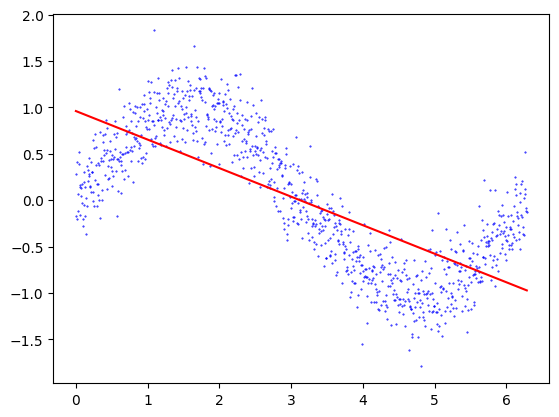

In [3]:
# 임의로 데이터 만들기 (사인 곡선 형태로)
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x) + 0.25*np.random.randn(len(x))
# y는 x에 대한 사인함수이기는 하나, 약간의 오차값 (랜덤한 노이즈)를 줄 것임. 

# 그림을 그려보자!
plt.scatter(x, y, s=0.2, color='b')

# 가장 간단한 형태의 fitting을 해줄 것임.(1차원 직선)
coeff = np.polyfit(x, y, 1)
# np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
# x, y 변수 들어가고, deg는 degree of fitting polynomial: polynomial한 방정식을 생각했을 때, 1차 방정식이냐 2차 방정식이냐 써주는 것
print(coeff) #[-0.30505064  0.93805313] -> [기울기, y절편]
yfit = coeff[1] + coeff[0]*x
plt.plot(x, yfit, color='r')

[ 4.42550413e-04  8.86299396e-02 -8.64539552e-01  1.88786169e+00
 -1.81747376e-01]


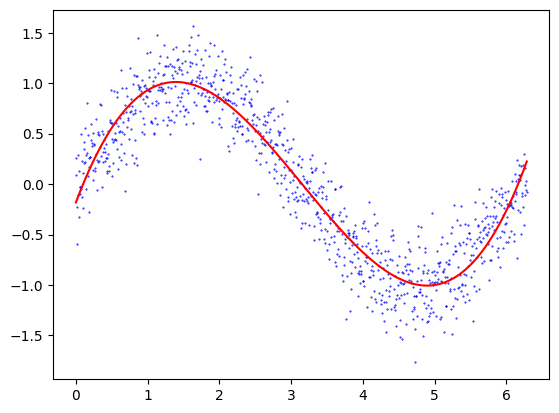

In [4]:
# 임의로 데이터 만들기 (사인 곡선 형태로)
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x) + 0.25*np.random.randn(len(x))
plt.scatter(x, y, s=0.2, color='b')

# 4차원 곡선으로 fitting 해줄 것임.
coeff = np.polyfit(x, y, 4) # a + b*x + c*x**2 + d*x**3 + e*x**4
print(coeff)
yfit = coeff[4] + coeff[3]*x + coeff[2]*x**2 + coeff[1]*x**3 + coeff[0]*x**4
plt.plot(x, yfit, color='r')

데이터를 눈으로 봤을 때, '어 이거 어떤 함수의 형태네.' 라고 생각할 수 있으면 어떤 함수로 가정하고 fitting 할 수 있음 -> 훨씬 더 좋은 fitting이 됨.

In [5]:
from scipy.optimize import curve_fit
# curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=None, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, nan_policy=None,**kwargs, )
# f: 내가 맞출 수식

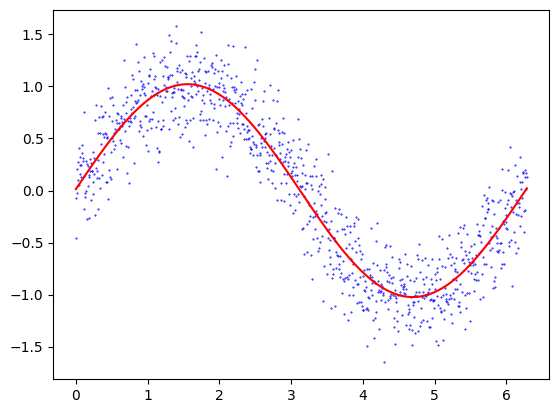

In [6]:
def sinfunc(x, p0, p1, p2, p3): # 데이터들이 이 수식을 따라야 하는 것을 알고 있다 하자.
    return p0 + p1*np.sin(p2*(x-p3)) # p0 + p1*sin(p2(x-p3))

# 임의로 데이터 만들기 (사인 곡선 형태로)
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x) + 0.25*np.random.randn(len(x))
plt.scatter(x, y, s=0.2, color='b')

p, pcov = curve_fit(sinfunc, x, y) # p가 coefficient
yfit = sinfunc(x, p[0], p[1], p[2], p[3])
plt.plot(x, yfit, color='r')

936.6546167377555


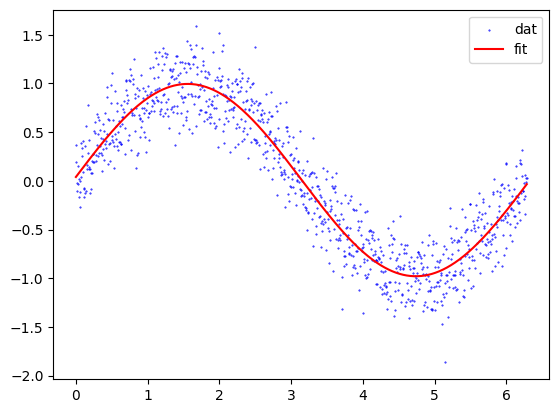

In [7]:
def sinfunc(x, p0, p1, p2, p3): 
    return p0 + p1*np.sin(p2*(x-p3)) # p0 + p1*sin(p2(x-p3))

x = np.linspace(0, 2*np.pi, 1000)
stdev = 0.25
nobs = len(x) #관측된 개수
yfluct = stdev*np.random.normal(size=nobs) #Gaussian형태
y = np.sin(x) + yfluct 
# y는 일단 사인 함수. yfluct가 없으면, 어떤 scatter가 없음. 
# 그래서 여기서 random noise를 줄 때, random noise를 사인 함수 값으로 부터 가우시안 분포를 갖도록 하기 위한 표현

sig = np.zeros(nobs) + stdev # 0.25로 된 1000개의 데이터
p, pcov = curve_fit(sinfunc, x, y, sigma=sig)

yexp = sinfunc(x, p[0], p[1], p[2], p[3])

# Compute chi square : 데이터가 얼마나 잘 맞는지 알아보기
chisq = np.sum(((y-yexp)/stdev)**2.0)
print(chisq)

plt.scatter(x, y, label='dat', s=0.2, color='b')
plt.plot(x, yexp, label='fit', color='r')
plt.legend()

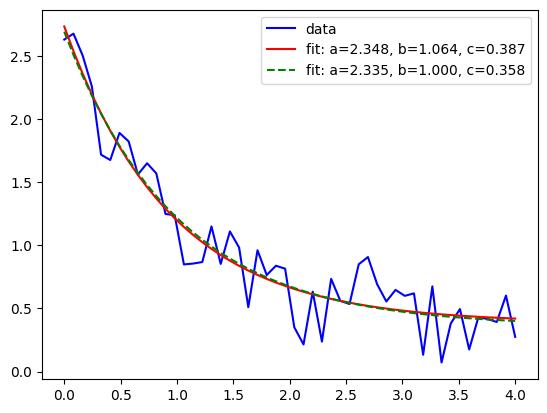

In [8]:
def func(x, a, b, c):
    return a*np.exp(-b*x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5) # a, b, c의 값을 일단 지정
yfluct = 0.2*np.random.normal(size=len(xdata))
ydata = y + yfluct
plt.plot(xdata, ydata, 'b-', label='data')

# save data
data = np.zeros([len(xdata),2])
data[:, 0] = xdata
data[:, 1] = ydata
np.savetxt('file.txt', data, fmt='%7.3f') # fmt='%7.3f': formating할 때, 7자리까지, 소수점 아래 3까지, 실수로 

p, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *p), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(p))

p, pcov = curve_fit(func, xdata, ydata, bounds=([0,0,0], [3,1.0,0.5])) #bounds=([0,0,0], [3,1.0,0.5])는 a, b, c 값의 범위 지정
plt.plot(xdata, func(xdata, *p), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(p))

plt.legend()

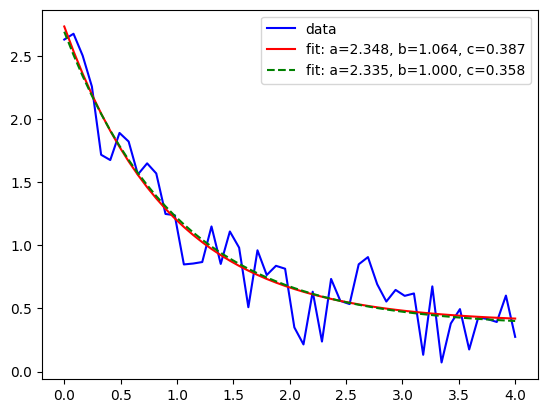

In [9]:
# 데이터 읽어오기
data = np.loadtxt('file.txt')
xdata = data[:,0]
ydata = data[:,1]

plt.plot(xdata, ydata, 'b-', label='data')

p, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *p), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(p))

p, pcov = curve_fit(func, xdata, ydata, bounds=([0,0,0], [3,1.0,0.5])) #bounds=([0,0,0], [3,1.0,0.5])는 a, b, c 값의 범위 지정
plt.plot(xdata, func(xdata, *p), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(p))

plt.legend()

실습

8.690621358199856


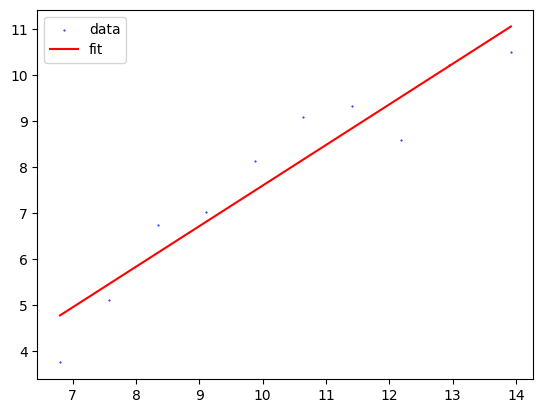

In [21]:
#1.

xi = [6.80, 7.57, 8.34, 9.11, 9.88, 10.64, 11.41, 12.18, 12.95, 13.92]
yi = [3.76, 5.11, 6.74, 7.02, 8.13, 9.10, 9.34, 8.59, 10.22, 10.51]

stdev = 0.7

def func(x, a, b):
    return b*x + a

Xi = np.array(xi)
Yi = np.array(yi)

plt.scatter(Xi, Yi, s=0.2, color='b', label='data')

p, pcov = curve_fit(func, Xi, Yi)
yfit = p[0] + p[1]*Xi

plt.plot(Xi, yfit, color='r', label='fit')

plt.legend()

chisq = np.sum(((Yi-yfit)/stdev)**2.0)
print(chisq)


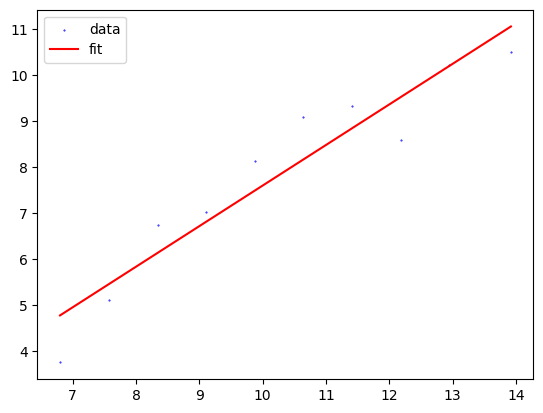

In [29]:
#2.
xi = [6.80, 7.57, 8.34, 9.11, 9.88, 10.64, 11.41, 12.18, 12.95, 13.92]
yi = [3.76, 5.11, 6.74, 7.02, 8.13, 9.10, 9.34, 8.59, 10.22, 10.51]

stdev = 0.7

def func(x, a, b):
    return b*x + a

Xi = np.array(xi)
Yi = np.array(yi)

plt.scatter(Xi, Yi, s=0.2, color='b', label='data')

coeff = np.polyfit(Xi, Yi, 1)
yfit = coeff[1] + coeff[0]*Xi

plt.plot(xi, yfit, '-', label='fit', c = 'red')
plt.legend()


5.028881052026962


C:\Users\jimin\AppData\Local\Temp\ipykernel_13516\2231205656.py:8: RuntimeWarning: invalid value encountered in log
  return a*x + b*np.log(x-c)


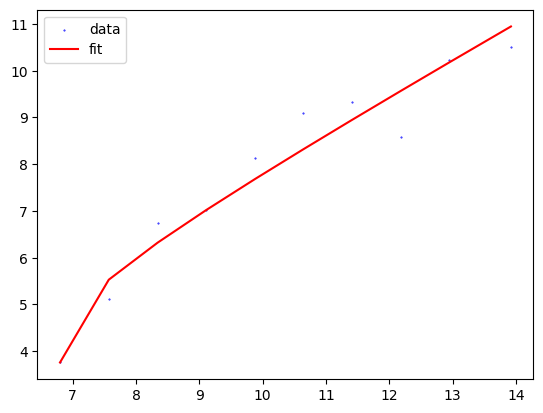

In [28]:
#3.
xi = [6.80, 7.57, 8.34, 9.11, 9.88, 10.64, 11.41, 12.18, 12.95, 13.92]
yi = [3.76, 5.11, 6.74, 7.02, 8.13, 9.10, 9.34, 8.59, 10.22, 10.51]

stdev = 0.7

def func(x, a, b, c):
    return a*x + b*np.log(x-c)

Xi = np.array(xi)
Yi = np.array(yi)

plt.scatter(Xi, Yi, s=0.2, color='b', label='data')

p, pcov = curve_fit(func, Xi, Yi)
yfit = func(Xi, p[0], p[1], p[2])

chisq = np.sum(((Yi-yfit)/stdev)**2.0)
print(chisq)

plt.plot(xi, yfit, label='fit', c = 'red')
plt.legend()

[-3.58518722e-05  2.01224882e-03 -2.12835954e-02 -1.18426140e-01
  7.51659493e-01]


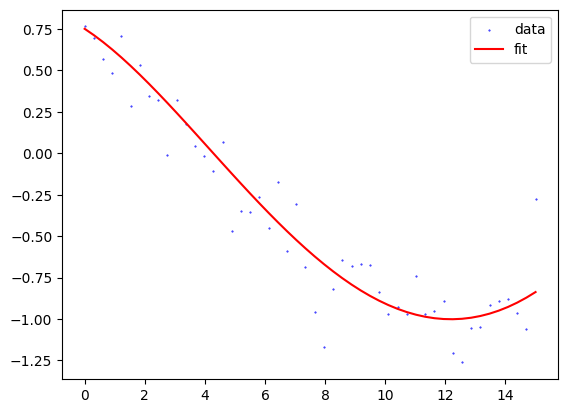

In [32]:
#4.
def f(x, a, b, c):
    return a*np.sin((x-b)/c)

a = 1.
b = 20.
c = 5.

x = np.linspace(0, 15, 50)
y = f(x,a,b,c,)
yfluct = 0.15*np.random.normal(size=len(x))
ydata = y + yfluct

plt.scatter(x, ydata, s=0.2, label='data', color = 'b')

coeff = np.polyfit(x, y, 4) # a + b*x + c*x**2 + d*x**3 + e*x**4
print(coeff)
yfit = coeff[4] + coeff[3]*x + coeff[2]*x**2 + coeff[1]*x**3 + coeff[0]*x**4
plt.plot(x, yfit, color='r', label='fit')

plt.legend()